
**Objective:**
The objective of this challenge is to build a machine learning model that helps predict the location and extent of floods in southern Malawi.


**Evaluation:**
RMSE

**Submission:**
For every row in the dataset, submission files should contain 2 columns: Square_ID and target_2019.



In [3]:
#load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder  
from sklearn.preprocessing import StandardScaler  
from scipy import sparse
from catboost import CatBoostRegressor
import lightgbm as lgb
import xgboost as xgb
from math import sqrt
from sklearn.metrics import mean_squared_error
from scipy.stats import uniform, randint
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit, cross_val_score, GridSearchCV, RandomizedSearchCV
import random
import dython
from dython import nominal

In [4]:
#load data
train = pd.read_csv("Train.csv")
submission = pd.read_csv("SampleSubmission.csv")

In [5]:
train.head()

,X,Y,target_2015,elevation,precip 2014-11-16 - 2014-11-23,precip 2014-11-23 - 2014-11-30,precip 2014-11-30 - 2014-12-07,precip 2014-12-07 - 2014-12-14,precip 2014-12-14 - 2014-12-21,precip 2014-12-21 - 2014-12-28,...,precip 2019-03-24 - 2019-03-31,precip 2019-03-31 - 2019-04-07,precip 2019-04-07 - 2019-04-14,precip 2019-04-14 - 2019-04-21,precip 2019-04-21 - 2019-04-28,precip 2019-04-28 - 2019-05-05,precip 2019-05-05 - 2019-05-12,precip 2019-05-12 - 2019-05-19,LC_Type1_mode,Square_ID
0,34.26,-15.91,0.0,887.764222,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,9,4e3c3896-14ce-11ea-bce5-f49634744a41
1,34.26,-15.90,0.0,743.403912,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,9,4e3c3897-14ce-11ea-bce5-f49634744a41
2,34.26,-15.89,0.0,565.728343,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,9,4e3c3898-14ce-11ea-bce5-f49634744a41
3,34.26,-15.88,0.0,443.392774,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,10,4e3c3899-14ce-11ea-bce5-f49634744a41
4,34.26,-15.87,0.0,437.443428,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,10,4e3c389a-14ce-11ea-bce5-f49634744a41


In [6]:
submission.head()

,Square_ID,target_2019
0,4e3c3896-14ce-11ea-bce5-f49634744a41,0.109
1,4e3c3897-14ce-11ea-bce5-f49634744a41,0.504
2,4e3c3898-14ce-11ea-bce5-f49634744a41,0.021
3,4e3c3899-14ce-11ea-bce5-f49634744a41,0.827
4,4e3c389a-14ce-11ea-bce5-f49634744a41,0.786


In [7]:
#summary
train.describe()

,X,Y,target_2015,elevation,precip 2014-11-16 - 2014-11-23,precip 2014-11-23 - 2014-11-30,precip 2014-11-30 - 2014-12-07,precip 2014-12-07 - 2014-12-14,precip 2014-12-14 - 2014-12-21,precip 2014-12-21 - 2014-12-28,...,precip 2019-03-17 - 2019-03-24,precip 2019-03-24 - 2019-03-31,precip 2019-03-31 - 2019-04-07,precip 2019-04-07 - 2019-04-14,precip 2019-04-14 - 2019-04-21,precip 2019-04-21 - 2019-04-28,precip 2019-04-28 - 2019-05-05,precip 2019-05-05 - 2019-05-12,precip 2019-05-12 - 2019-05-19,LC_Type1_mode
count,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,...,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.00000
mean,35.077656,-15.813802,0.076609,592.848206,1.610760,2.502058,1.162076,8.270610,8.892459,9.572821,...,35.637354,2.126234,3.453395,3.559366,9.127677,1.660709,0.526144,0.968101,1.585743,10.73175
std,0.392395,0.359789,0.228734,354.790357,4.225461,8.631846,4.396676,4.263375,3.760052,4.523767,...,14.519169,3.734829,8.007248,3.820294,6.868937,4.418032,1.494935,3.690698,4.651863,2.02610
min,34.260000,-16.640000,0.000000,45.541444,0.000000,0.000000,0.000000,1.411452,3.580342,1.254098,...,15.803429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.00000
25%,34.760000,-16.070000,0.000000,329.063852,0.000000,0.000000,0.000000,5.548440,5.905440,6.179885,...,22.021763,0.000000,0.000000,0.000000,4.352528,0.000000,0.000000,0.000000,0.000000,9.00000
50%,35.050000,-15.800000,0.000000,623.000000,0.000000,0.000000,0.000000,7.941822,8.618390,8.786780,...,34.275716,0.896323,0.000000,2.607053,7.862453,0.000000,0.000000,0.000000,0.000000,10.00000
75%,35.390000,-15.520000,0.000000,751.434813,1.261848,0.000000,0.000000,10.887235,10.960668,12.670775,...,44.253897,2.076590,2.914996,6.390000,13.459070,0.000000,0.000000,0.000000,0.000000,12.00000
max,35.860000,-15.210000,1.000000,2803.303645,19.354969,41.023858,22.020803,18.870675,23.044340,21.757828,...,72.123185,16.403638,37.059980,12.979454,46.367849,19.475846,6.914834,18.170051,20.092777,17.00000


In [8]:
#check for missing data
train.isnull().sum()

X                                 0
Y                                 0
target_2015                       0
elevation                         0
precip 2014-11-16 - 2014-11-23    0
precip 2014-11-23 - 2014-11-30    0
precip 2014-11-30 - 2014-12-07    0
precip 2014-12-07 - 2014-12-14    0
precip 2014-12-14 - 2014-12-21    0
precip 2014-12-21 - 2014-12-28    0
precip 2014-12-28 - 2015-01-04    0
precip 2015-01-04 - 2015-01-11    0
precip 2015-01-11 - 2015-01-18    0
precip 2015-01-18 - 2015-01-25    0
precip 2015-01-25 - 2015-02-01    0
precip 2015-02-01 - 2015-02-08    0
precip 2015-02-08 - 2015-02-15    0
precip 2015-02-15 - 2015-02-22    0
precip 2015-02-22 - 2015-03-01    0
precip 2015-03-01 - 2015-03-08    0
precip 2015-03-08 - 2015-03-15    0
precip 2019-01-20 - 2019-01-27    0
precip 2019-01-27 - 2019-02-03    0
precip 2019-02-03 - 2019-02-10    0
precip 2019-02-10 - 2019-02-17    0
precip 2019-02-17 - 2019-02-24    0
precip 2019-02-24 - 2019-03-03    0
precip 2019-03-03 - 2019-03-

In [9]:
train["target_2015"]

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
16461    0.0
16462    0.0
16463    0.0
16464    0.0
16465    0.0
Name: target_2015, Length: 16466, dtype: float64

In [10]:
train['target_2015'].value_counts().head()

0.000000    13701
1.000000      385
0.129089        5
0.032284        5
0.983864        5
Name: target_2015, dtype: int64

In [12]:
train['target'] = np.where(train['target_2015']>0, '1', '0')
percent_target = train.groupby('target').count()
percent_target['percent'] = 100*(percent_target['target_2015']/train['target'].count())
percent_target.reset_index(level=0, inplace=True)
percent_target

,target,X,Y,target_2015,elevation,precip 2014-11-16 - 2014-11-23,precip 2014-11-23 - 2014-11-30,precip 2014-11-30 - 2014-12-07,precip 2014-12-07 - 2014-12-14,precip 2014-12-14 - 2014-12-21,...,precip 2019-03-31 - 2019-04-07,precip 2019-04-07 - 2019-04-14,precip 2019-04-14 - 2019-04-21,precip 2019-04-21 - 2019-04-28,precip 2019-04-28 - 2019-05-05,precip 2019-05-05 - 2019-05-12,precip 2019-05-12 - 2019-05-19,LC_Type1_mode,Square_ID,percent
0,0,13701,13701,13701,13701,13701,13701,13701,13701,13701,...,13701,13701,13701,13701,13701,13701,13701,13701,13701,83.207822
1,1,2765,2765,2765,2765,2765,2765,2765,2765,2765,...,2765,2765,2765,2765,2765,2765,2765,2765,2765,16.792178


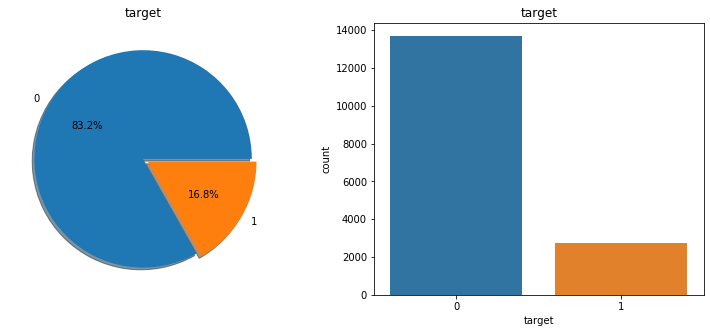

In [13]:

f,ax=plt.subplots(1,2,figsize=(13,5))
train['target'].value_counts().plot.pie(explode=[0,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot('target',data=train,ax=ax[1])
ax[1].set_title('target')
plt.show()